In [1]:
import pandas as pd
import string
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load Kaggle dataset
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

# Add labels to the datasets
fake_data['label'] = 'fake'
true_data['label'] = 'real'

# Combine datasets
data = pd.concat([fake_data, true_data], ignore_index=True)

# Remove missing values
data = data.dropna()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['text'] = data['text'].apply(clean_text)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",fake


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

# Model training on all data for demonstration
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict, max_depth=20)
model.fit(X, y)

RandomForestClassifier(class_weight={'fake': np.float64(0.9560495719943785),
                                     'real': np.float64(1.0481860204510436)},
                       max_depth=20, random_state=42)

Accuracy on all data: 0.993251369771482
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99     23481
        real       0.99      0.99      0.99     21417

    accuracy                           0.99     44898
   macro avg       0.99      0.99      0.99     44898
weighted avg       0.99      0.99      0.99     44898



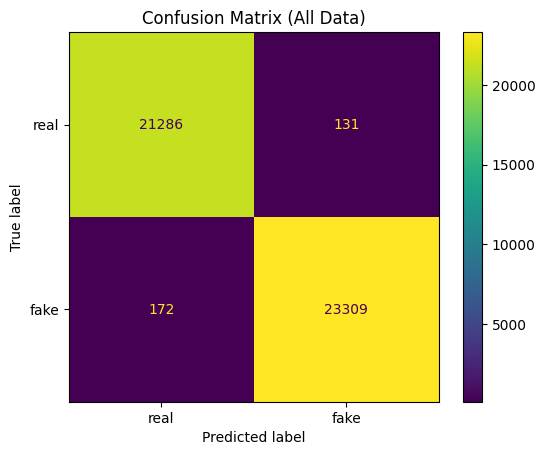

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Model evaluation on all data
y_pred_all = model.predict(X)
print("Accuracy on all data:", accuracy_score(y, y_pred_all))
print(classification_report(y, y_pred_all))

# Confusion Matrix on all data
cm = confusion_matrix(y, y_pred_all, labels=['real', 'fake'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real', 'fake'])
disp.plot(cmap='viridis')  # Use a perceptually uniform colormap for better visualization
plt.title('Confusion Matrix (All Data)')
plt.show()

In [4]:
# Example prediction for new/unseen news
sample = ["This is a sample news article to test fake news detection."]
sample_vec = vectorizer.transform(sample)
prediction = model.predict(sample_vec)
print("Prediction for sample:", prediction[0])

Prediction for sample: fake
